In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/FIN_BERT/finBERT/data/sentiment_data'

/content/gdrive/MyDrive/FIN_BERT/finBERT/data/sentiment_data


In [3]:
# import all libraries

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.widgets import Cursor,Button
import numpy as np

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore')

In [7]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

ImportError: ignored

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [14]:
# read data

In [15]:
train=pd.read_csv('train.csv',sep='\t')
test=pd.read_csv('test.csv',sep='\t')

In [16]:
# remove extra column

In [17]:
train=train.drop('Unnamed: 0',axis=1)
test=test.drop('Unnamed: 0',axis=1)

In [18]:
print(train.head(2))
print(test.head(2))

                                                text     label
0  We can capitalize on our experience from a num...  positive
1  This location makes the mall a convenient plac...  positive
                                                text     label
0  Finnish IT solutions provider Affecto Oyj said...  positive
1  SRV will raise its holding in the company so t...  positive


# Data Exploration and Visulization

In [ ]:
# Display category counts in data

In [23]:
train['label'].value_counts()/len(train) * 100

neutral     59.375
positive    28.125
negative    12.500
Name: label, dtype: float64

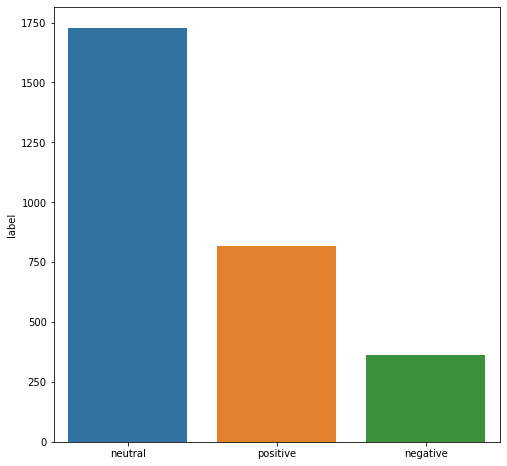

DISTRIBUTION OF CLASSES


In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
counts = train['label'].value_counts() 
sns.barplot(x=counts.index, y=counts, ax=ax)
plt.show()
print('DISTRIBUTION OF CLASSES')

In [ ]:
# Convert train data text to single word corpus

In [ ]:
# remove single letter
new_corpus=[]
for i in train['text']:
    a=i.split(' ')
    for j in a:
        if len(j)>1:
            new_corpus.append(j)

In [ ]:
new_corpus = [x.lower() for x in new_corpus] 
stop_words = set(stopwords.words('english'))  
filtered_sentence = [w for w in new_corpus if not w in stop_words] # remove stop words

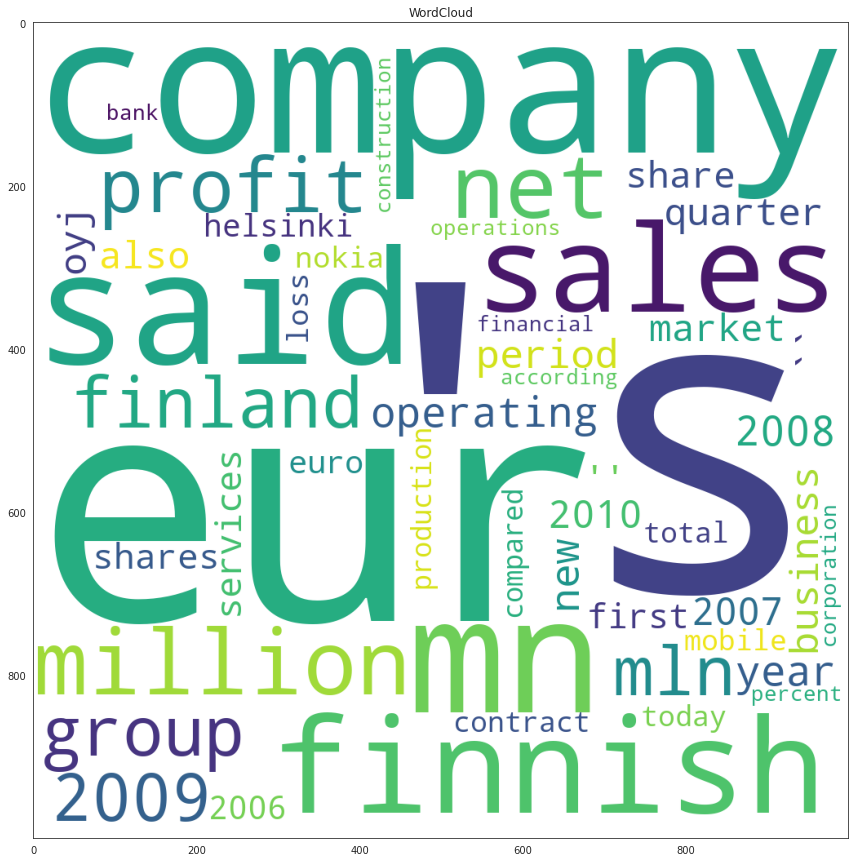

 Most appering 50 words


In [ ]:
#find frequency of words
from nltk.probability import FreqDist
fdist = FreqDist()
for word in filtered_sentence:
    fdist[word.lower()]+=1
dict(fdist)
fdist_top50 = fdist.most_common(50)
d = dict(fdist_top50)

from wordcloud import WordCloud
# get word cloud for top 50 words
sns.set_style('white')
plt.figure(figsize=(15,15))
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=50,
              relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(d)
plt.title('WordCloud')
plt.imshow(wc)
plt.show()
print(" Most appering 50 words")

In [ ]:
 from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
  
# Input the file  
txt1 = train['text']
# Preprocessing 
def remove_string_special_characters(s): 
      
    # removes special characters with ' ' 
    stripped = re.sub('[^a-zA-z\s]', '', s) 
    stripped = re.sub('_', '', stripped) 
      
    # Change any white space to one space 
    stripped = re.sub('\s+', ' ', stripped) 
      
    # Remove start and end white spaces 
    stripped = stripped.strip() 
    if stripped != '': 
            return stripped.lower() 
          
# Stopword removal  
stop_words = set(stopwords.words('english')) 
your_list = ['skills', 'ability', 'job', 'description','if'] 
for i, line in enumerate(txt1): 
    txt1[i] = ' '.join([x for 
        x in nltk.word_tokenize(line) if 
        ( x not in stop_words ) and ( x not in your_list )]) 
      
# Getting trigrams  
vectorizer = CountVectorizer(ngram_range = (3,3)) 
X1 = vectorizer.fit_transform(txt1)  
features = (vectorizer.get_feature_names()) 
print("\n\nFeatures : \n", features) 
print("\n\nX1 : \n", X1.toarray()) 
  
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
X2 = vectorizer.fit_transform(txt1) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 
  
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", words.head(50)) 




Features : 
 ['00 aldata shares', '00 an increase', '00 aspo systems', '00 compared eur0', '00 eet august', '00 eet elcoteq', '00 finnish time', '00 per share', '00 registered finnish', '00 sanoma published', '000 000 based', '000 000 market', '000 13 300', '000 2008 versus', '000 2009 lifted', '000 270 000', '000 60 000', '000 85 000', '000 alma media', '000 barrels day', '000 based resolutions', '000 biscuit cartons', '000 caused sale', '000 cd porvoo', '000 chairman board', '000 chairman eur', '000 company added', '000 componenta corporation', '000 corresponding period', '000 cu 000', '000 cu included', '000 deputy chairman', '000 end 2007', '000 eur 600', '000 eur 70', '000 eur million', '000 eur7 corresponding', '000 eur900 000', '000 euro 14', '000 euro 319', '000 euro 388', '000 euro 395', '000 euro 421', '000 euro 575', '000 euro 623', '000 euro mln', '000 euros recipients', '000 feet foot', '000 first quarter', '000 housing consultant', '000 km car', '000 kroon par', '000 la

<Figure size 1440x1440 with 0 Axes>

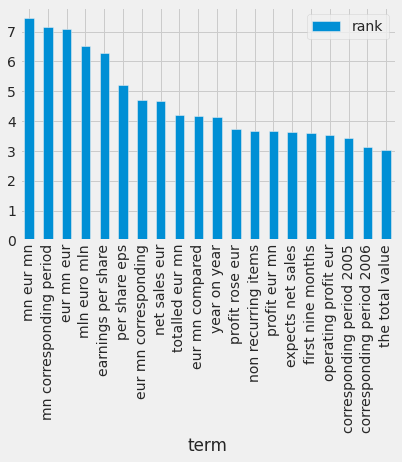

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,20))
words[:20].plot(x ='term', y='rank', kind = 'bar')
plt.show()

# trigram based on ranking

In [ ]:
# get BiGrams
bigrams = nltk.collocations.BigramAssocMeasures()
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(filtered_sentence)

In [ ]:
#bigrams
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)


In [ ]:
bigramFreqTable

,bigram,freq
52,"(net, sales)",148
50,"(operating, profit)",111
409,"(mn, eur)",86
387,"(company, 's)",84
137,"(mln, euro)",73
...,...,...
11671,"(2006, hobby)",1
11670,"(7.1, mln)",1
11669,"(profit, 7.1)",1
11668,"(2007, compared)",1


<Figure size 1440x1440 with 0 Axes>

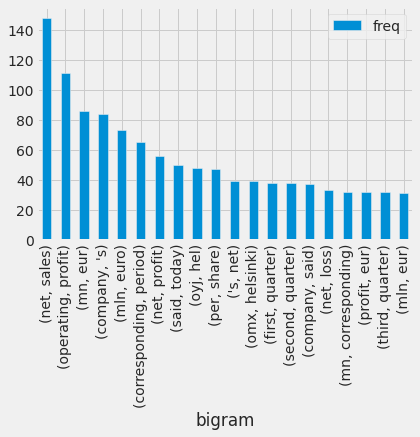

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,20))
bigramFreqTable[:20].plot(x ='bigram', y='freq', kind = 'bar')
plt.show()

# biigram based on ranking

# Data Preprocessing

In [ ]:
stop = stopwords.words('english')
train.text = [token for token in train.text if token not in stop]
test.text = [token for token in test.text if token not in stop]

In [ ]:
tokenizer = Tokenizer(num_words=200) 
tokenizer.fit_on_texts(train.text)
X_train = tokenizer.texts_to_sequences(train.text)
X_train = pad_sequences(X_train, maxlen=50)
X_test = tokenizer.texts_to_sequences(test.text)
X_test = pad_sequences(X_test, maxlen=50)
X_train.shape, X_test.shape

((2912, 50), (967, 50))

In [ ]:
unique_categories = list(train.label.unique())
y_train = np.array([unique_categories.index(i) for i in train.label])
y_train = to_categorical(y_train)

In [ ]:
y_test = np.array([unique_categories.index(i) for i in test.label])
y_test = to_categorical(y_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2912, 50)
(2912, 3)


# MODEL BUILDING

In [ ]:
embed_dim = 128
lstm_out = 196
max_fatures = 200

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X_train.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 128)           25600     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 591       
Total params: 280,991
Trainable params: 280,991
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# embed_dim = 128
# lstm_out = 196
# max_fatures = 200

# # model = Sequential()
# # model.add(Embedding(max_fatures, embed_dim,input_length = 100))
# # model.add(SpatialDropout1D(0.4))
# # model.add(RNN(lstm_out, dropout=0.2, recurrent_dropout=0.2))
# # model.add(Dense(3,activation='softmax'))
# # print(model.summary())


# model = Sequential()
# model.add(Embedding(input_dim=1000, output_dim=64))
# model.add(SimpleRNN(128))
# model.add(Dense(3))
# model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
# model.summary()

In [ ]:
model.fit(X_train, y_train, epochs=1, batch_size = 100)

30/30 [==============================] - 20s 504ms/step - loss: 0.9786 - accuracy: 0.5715


# MODEL TESTING

In [ ]:
model.evaluate(X_test, y_test)  

31/31 [==============================] - 2s 36ms/step - loss: 0.8567 - accuracy: 0.6267


[0.8567091822624207, 0.6266804337501526]

In [ ]:
test_prob = model.predict(X_test) # this returns the probabilities
test_pred_classes = np.argmax(test_prob, axis=1) # convert probabilities to classes

In [ ]:
print("Prediction: ",model.predict_classes(X_test[5:10]))
print("Actual:",y_test[5:10])

Prediction:  [1 1 1 1 1]
Actual: [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# INFERENCE / PREDICTION

In [ ]:
new_case=test['text'][1:2]

In [ ]:
new_case

1    SRV will raise its holding in the company so t...
Name: text, dtype: object

In [ ]:
newcase = tokenizer.texts_to_sequences(new_case)
newcase = pad_sequences(newcase, maxlen=50)

In [ ]:
unique_categories
# positive is 0
# negative is 1
# neutral is 2

['positive', 'negative', 'neutral']

In [ ]:
prediction=int(model.predict_classes(newcase))

In [ ]:
prediction

2

In [ ]:
# embed_dim = 128
# lstm_out = 196
# max_fatures = 200

# model = Sequential()
# model.add(Embedding(max_fatures, embed_dim,input_length = X_train.shape[1]))
# model.add(SpatialDropout1D(0.4))
# model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(2,activation='sigmoid'))
# model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
# print(model.summary())